In [3]:
import string
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import pad_sequences, to_categorical
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

2023-05-02 17:49:16.180840: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df['Text'].size

22000

In [6]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [7]:
lang = ['Swedish', 'Chinese', 'English', 'Hindi', 'Japanese', 'Korean']
data = df[df['language'].isin(lang)]

In [8]:
data

,Text,language
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese
13,胡赛尼本人和小说的主人公阿米尔一样，都是出生在阿富汗首都喀布尔，少年时代便离开了这个国家。胡...,Chinese
14,한국에서 성씨가 사용되기 시작한 정확한 시기는 알 수 없으나 한자漢字 등 중국 문물...,Korean
...,...,...
21967,हिंदी और उर्दू के एक मिले जुले रूप को हिंदुस्त...,Hindi
21976,세기부터 세기까지 고전 포르투갈어의 두 번째 시기는 대항해 시대와 맞물려 아시아와 ...,Korean
21982,戈尔巴乔夫结束了苏共的专制和暴政，使人民获得了民主、法治和自由，并使得东欧国家自主发展，结束...,Chinese
21986,mozilla add-ons は、mozilla firefox、mozilla thun...,Japanese


# Preprocessing the language name.(Label encoding)

In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(df['language'])

# Remove the stopwards from sentences

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

ps = PorterStemmer()
chopped = []
i = 0
for lan in data['Text']:
    rev = re.sub("^[a-zA-Z]",' ', lan)
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if set(stopwords.words())]
    rev = ' '.join(rev)
    chopped.append(rev)
    i += 1
    print(f"Iteration {i} run.")

Iteration 1 run.
Iteration 2 run.
Iteration 3 run.
Iteration 4 run.
Iteration 5 run.
Iteration 6 run.
Iteration 7 run.
Iteration 8 run.
Iteration 9 run.
Iteration 10 run.
Iteration 11 run.
Iteration 12 run.
Iteration 13 run.
Iteration 14 run.
Iteration 15 run.
Iteration 16 run.
Iteration 17 run.
Iteration 18 run.
Iteration 19 run.
Iteration 20 run.
Iteration 21 run.
Iteration 22 run.
Iteration 23 run.
Iteration 24 run.
Iteration 25 run.
Iteration 26 run.
Iteration 27 run.
Iteration 28 run.
Iteration 29 run.
Iteration 30 run.
Iteration 31 run.
Iteration 32 run.
Iteration 33 run.
Iteration 34 run.
Iteration 35 run.
Iteration 36 run.
Iteration 37 run.
Iteration 38 run.
Iteration 39 run.
Iteration 40 run.
Iteration 41 run.
Iteration 42 run.
Iteration 43 run.
Iteration 44 run.
Iteration 45 run.
Iteration 46 run.
Iteration 47 run.
Iteration 48 run.
Iteration 49 run.
Iteration 50 run.
Iteration 51 run.
Iteration 52 run.
Iteration 53 run.
Iteration 54 run.
Iteration 55 run.
Iteration 56 run.
I

# Convert input into vectors(with max features of 2000)

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(chopped).toarray()

In [81]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
#Fit encoder
encoder = LabelEncoder()
encoder.fit(['Swedish', 'Chinese', 'English', 'Hindi', 'Japanese', 'Korean'])
# Filter the dataframe to only include the desired languages
df_filtered = df[df['language'].isin(lang)]
y_encoded = encoder.fit_transform(df_filtered['language'])
y_dum = np_utils.to_categorical(y_encoded, num_classes=6)

In [15]:
y

0        False
1         True
2        False
3        False
4        False
         ...  
21995    False
21996    False
21997    False
21998     True
21999    False
Name: language, Length: 22000, dtype: bool

In [82]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y_dum, train_size=0.7)
# Now since we want the valid and test size to be equal (10% each of overall data).
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

In [12]:
# Count the values in language
df['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

# Define an RNN model for language detection.

In [83]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Embedding(input_dim=2000, output_dim=128))
model_2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
model_2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model_2.add(tf.keras.layers.Dense(500, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model_2.add(tf.keras.layers.Dropout(0.4))
model_2.add(tf.keras.layers.Dense(500, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model_2.add(tf.keras.layers.Dropout(0.4))
model_2.add(tf.keras.layers.Dense(6, activation="softmax"))
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         256000    
                                                                 
 bidirectional_6 (Bidirectio  (None, None, 256)        263168    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 500)               64500     
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 dense_10 (Dense)            (None, 500)              

In [84]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
classifier = model_2.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/10
33/33 [==============================] - 1503s 45s/step - loss: 2.2359 - accuracy: 0.1593 - val_loss: 2.0392 - val_accuracy: 0.1678
Epoch 2/10
33/33 [==============================] - 1488s 44s/step - loss: 1.9485 - accuracy: 0.1629 - val_loss: 1.8782 - val_accuracy: 0.1722
Epoch 3/10
33/33 [==============================] - ETA: 0s - loss: 1.8466 - accuracy: 0.1705 

In [26]:
loss, accuracy = model_2.evaluate(X_test, y_test, batch_size=128)
print('Test accuracy:', accuracy)

8/8 [==============================] - 34s 4s/step - loss: 0.8951 - accuracy: 0.6000
Test accuracy: 0.6000000238418579


# Save Model

In [56]:
import joblib
joblib.dump(model_2, 'language_detection.sav')

INFO:tensorflow:Assets written to: ram://eb6a52bc-29e8-46b4-8d15-cb49e2170509/assets


INFO:tensorflow:Assets written to: ram://eb6a52bc-29e8-46b4-8d15-cb49e2170509/assets


['language_detection.sav']

# Load Model

In [57]:
model = joblib.load('language_detection.sav')

In [71]:
# This function is used for testing the model.
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()
def test_model(test_sentence):
    languages = {
        'Chinese' : 0,
        'English' : 1,
        'Hindi' : 2,
        'Japanese' : 3,
        'Korean' : 4,
        'Swedish' : 5
    }

    rev = re.sub('^[a-zA-Z]',' ',test_sentence)
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words())]
    rev = ' '.join(rev)

    rev = cv.transform([rev]).toarray()

    #rev = np.reshape(rev, (1, -1))
    output = model.predict(rev)[0]
    max_index = output.argmax()
    keys = list(languages)
    # values = list(languages.values())
    # position = values.index(output)
    #
    output = keys[max_index]

    print(output)

In [69]:
test_model('तुम्हारी माँ')

1/1 [==============================] - 0s 201ms/step
Japanese


In [72]:
test_model('大湾区之恋')

1/1 [==============================] - 0s 384ms/step
[0.2875269  0.00502506 0.2681063  0.40611672 0.02463026 0.00859477]


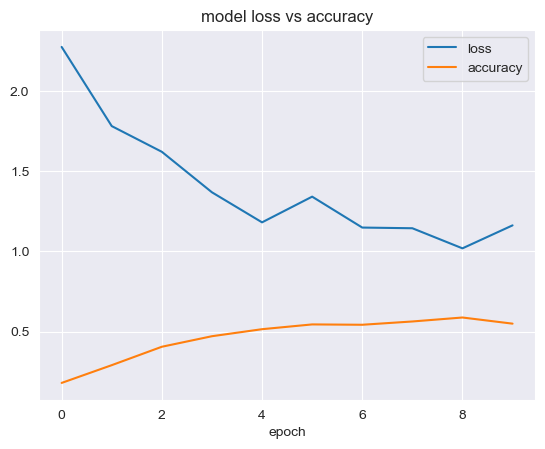

In [86]:
import matplotlib.pyplot as plt
plt.plot(classifier.history['loss'])
plt.plot(classifier.history['accuracy'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()